# Notes

Important to note is that the time in the datetime, denoted as "15:00:00" for instance, refers to the start of the product. So "15:00:00" refers to delivery hour 15:00–16:00. The Excel sheets often denote products by the numbered hour of the day, 1H-16 for instance. Thus, "15:00:00" corresponds with product code: 1H-16.

# Preamble

In [1]:
import os
os.system('clear')

import numpy as np
import pandas as pd
from datetime import datetime

from termcolor import colored
from SecretColors.palette import Palette
material = Palette("material", color_mode = 'hexa')

hex_salmon = '#F68F83'
hex_gold = '#BC9661'
hex_indigo = '#2D2E5F'
hex_maroon = '#8C4750'
hex_white = '#FAFAFA'
hex_blue = '#7EB5D2'

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
mpl.rcParams['font.family'] = 'SF Compact Text'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[hex_indigo, hex_salmon, hex_maroon])
mpl.rcParams["figure.titlesize"] = 'large'
mpl.rcParams["figure.titleweight"] = 'semibold'

print('')
print(colored('...','white'))
print('')
print(colored(f'Finished successfully', 'green'))
print('')
print(colored('...','white'))
print('')


...

Finished successfully

...



# Specify period

In [2]:
# years = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
years = ['2015','2016','2017','2018','2019']
country = 'NL'

# Converting intraday (raw) data to intradady (pkl)

In [3]:
# # RAW (ID)

# flist = [f for f in sorted(os.listdir("./raw")) if not (f.startswith('.') or f.startswith('~'))]

# print('')
# print(colored('...','white'))
# print('')
# print(colored(f'Files in directory: {flist}', 'blue'))
# print('')

# years = ['2015','2016','2017','2018','2019']

# for filename in flist:
#     y = filename[:4]
#     if y in years:

#         print(colored('...','white'))
#         print('')
#         print(colored(f'Currently processing file: {filename}', 'blue'))
#         print(colored(f'Currently processing year: {y}', 'blue'))
#         print('')
        
#         df = pd.read_excel(f"./raw/{filename}", header = None, skip_blank_lines=True, decimal=',', thousands='.')
#         df = df.replace('Instrument code', 'Instrumentcode')
#         df = df.replace('Contract type', 'Contracttype')
#         df = df.dropna(how = 'all', axis = 0)
#         df = df.dropna(how = 'all', axis = 1)
#         df = df.reset_index(drop = True)
        
#         df.columns = df.iloc[0]
#         df = df.drop(0)

#         df = df[~df['Instrumentcode'].str.contains('1H-25')]

#         df1 = df[~df['Instrumentcode'].str.contains('NL ID ')]
#         df2 = df[df['Instrumentcode'].str.contains('NL ID ')]

#         df1['Date'] = pd.to_datetime(df1['Instrumentcode'].str[:7], format = '%d%b%y')
#         df2['Date'] = pd.to_datetime(df2['Instrumentcode'].str.replace("NL ID ", "").str[:7], format = '%y%b%d')
#         df = pd.concat([df1, df2]).sort_index()

#         df = df[df['Date'].dt.year == int(y)]

#         df['Time'] = (df['Instrumentcode'].str[-2:].astype('int64') - 1).astype('str')
#         df['Date'] = pd.to_datetime(df['Date'].dt.strftime("%Y-%m-%d") + ' ' + df['Time'].astype(str) + ':00:00')

#         df['Price'] = df['Price'].astype('float')
#         df['Volume'] = df['Volume'].astype('float')

#         df.to_pickle(f"./{os.path.splitext(filename)[0]}.pkl")

# print(colored('...','white'))
# print('')
# print(colored(f'Finished successfully', 'green'))
# print('')
# print(colored('...','white'))
# print('')

# Convert day-ahead (raw) to day-ahead (df)

In [4]:
# DAY AHEAD (DA)

flist = [f for f in sorted(os.listdir("./rawDA")) if not (f.startswith('.') or f.startswith('~'))]

print('')
print(colored('...','white'))
print('')
print(colored(f'Files in directory: {flist}', 'blue'))
print('')

df_da2 = pd.DataFrame()

big_df = pd.DataFrame()
date = []
mcp = []

for filename in flist:

    y = filename[24:28]
    if y in years:

        print(colored('...','white'))
        print('')
        print(colored(f'Currently processing file: {filename}', 'blue'))
        print(colored(f'Currently processing year: {y}', 'blue'))
        print('')

        df_da = pd.read_excel(f"./rawDA/{filename}", sheet_name="prices_2", skip_blank_lines=True, decimal=',', thousands='.')
        for index, row in df_da.iterrows():
            for t in range(1, 25):
                t2 = t - 1
                if t <= 9:
                    t = f'0{t}'
                # df2['Date'] = pd.to_datetime(df2['Date'])
                # print(type(row['PRICES'].strftime("%Y-%m-%d") + ' ' + f'{t}' + ':00:00'))
                # df2 = df2.append(row['PRICES'].strftime("%Y-%m-%d") + ' ' + f'{t}' + ':00:00', row[f'Hour {t}']) 
                date.append(row['PRICES'].strftime("%Y-%m-%d") + ' ' + f'{t2}' + ':00:00')
                mcp.append(row[f'Hour {t}'])
                # df2['MCP'] = df2['MCP'].append(row[f'Hour {t}'])
                # pd.to_datetime(df_group3['Date'], format='(%Y, %m, %d, %H)')
                
                # df2['Date2'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d %H')

                # pd.to_datetime(df_group3['Date'], format='(%Y, %m, %d, %H)')
                
                # df2['Date'] = pd.to_datetime(df2, format='(%Y, %m, %d, %H)')
        
        df_da2 = pd.DataFrame(date)
        df_da2.columns = ['Date']
        df_da2['MCP'] = pd.DataFrame(mcp)
        df_da2 = df_da2.set_index(pd.DatetimeIndex(df_da2['Date']))
        df_da2 = df_da2.drop(['Date'], axis=1)

print(colored('...','white'))
print('')
print(colored(f'(DA) Grouped by hour', 'blue'))
print('')

print(colored('...','white'))
print('')
print(df_da2)
print('')

print(colored('...','white'))
print('')
print(colored(f'Finished successfully', 'green'))
print('')
print(colored('...','white'))
print('')


...

Files in directory: ['DAM - Historical data - 2015.xls', 'DAM - Historical data - 2016.xls', 'DAM - Historical data - 2017.xls', 'DAM - Historical data - 2018.xls', 'DAM - Historical data - 2019.xls']

...

Currently processing file: DAM - Historical data - 2015.xls
Currently processing year: 2015

...

Currently processing file: DAM - Historical data - 2016.xls
Currently processing year: 2016

...

Currently processing file: DAM - Historical data - 2017.xls
Currently processing year: 2017

...

Currently processing file: DAM - Historical data - 2018.xls
Currently processing year: 2018

...

Currently processing file: DAM - Historical data - 2019.xls
Currently processing year: 2019

...

(DA) Grouped by hour

...

                       MCP
Date                      
2015-01-01 00:00:00  38.50
2015-01-01 01:00:00  38.22
2015-01-01 02:00:00  35.60
2015-01-01 03:00:00  33.00
2015-01-01 04:00:00  27.41
...                    ...
2019-12-31 19:00:00  46.00
2019-12-31 20:00:00  42.20


# Convert intraday (pkl) to intraday (df)

In [5]:
# INTRADAY (ID)

dfo = pd.DataFrame()
dfo_group = pd.DataFrame()
dfo_group2 = pd.DataFrame()
dfo_group3 = pd.DataFrame()

price = []
volume = []
breaks = []

for y in years:
    i = years.index(y)

    df = pd.read_pickle(f"./{y}_Intraday.pkl")
    # df['Price'] = df['Price'].astype('float')
    # df['Volume'] = df['Volume'].astype('float')
    # print(df['Price'])
    # print(df['Volume'])

    df['Creation timestamp (GMT)'] = pd.to_datetime(df['Creation timestamp (GMT)'], format='%d-%m-%Y %H:%M:%S')

    volume_buy = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'buy', 'Volume'].sum()
    volume_sell = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'sell', 'Volume'].sum()

    price_buy = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'buy', 'Price'].sum()
    price_sell = df.loc[df['Contracttype'] == 'Spot'].loc[df['Side'] == 'sell', 'Price'].sum()

    df_group = df.drop(['Instrumentcode', 'Contracttype', 'Side'], axis=1).groupby([(df['Date'].dt.year),(df['Date'].dt.month)]).sum()
    # df.columns = df.iloc[0]

    

    df_group['Date'] = df_group.index
    df_group['Date'] = pd.to_datetime(df_group['Date'], format='(%Y, %m)')

    df_group2 = df.drop(['Instrumentcode', 'Contracttype', 'Side'], axis=1).groupby([(df['Date'].dt.year), (df['Date'].dt.month), (df['Date'].dt.day)]).mean()
    df_group2['Date'] = df_group2.index
    df_group2['Date'] = pd.to_datetime(df_group2['Date'], format='(%Y, %m, %d)')

    df_group3 = df.drop(['Instrumentcode', 'Contracttype', 'Side'], axis=1).groupby([(df['Date'].dt.year), (df['Date'].dt.month), (df['Date'].dt.day), (df['Date'].dt.hour)]).mean()
    df_group3['Date'] = df_group3.index
    df_group3['Date'] = pd.to_datetime(df_group3['Date'], format='(%Y, %m, %d, %H)')

    df_group = df_group.set_index(pd.DatetimeIndex(df_group['Date']))
    df_group2 = df_group2.set_index(pd.DatetimeIndex(df_group2['Date']))
    df_group3 = df_group3.set_index(pd.DatetimeIndex(df_group3['Date']))

    dfo = dfo.append(df, ignore_index = False)
    dfo_group = dfo_group.append(df_group, ignore_index = False)
    dfo_group2 = dfo_group2.append(df_group2, ignore_index = False)
    dfo_group3 = dfo_group3.append(df_group3, ignore_index = False)
    # dfo2 = dfo2.append(df, ignore_index = False)
    # breaks.append(len(dfo))

    price.append(df['Price'].sum())
    volume.append(df['Volume'].sum())
    
    print('')
    print(colored('...','white'))
    print('')
    print(colored(f'Year: {y}', 'blue'))
    print('')
    print(colored(f'Price: {int(round(price[i]))} Euro', 'blue'))
    print(colored(f'Volume: {int(round(volume[i]))} MWh', 'blue'))
    
print('')
print(colored('...','white'))
print('')
print(colored(f'Period: {years[0]}–{years[-1]}', 'blue'))
print('')
print(colored(f'Price (sum): {int(round(sum(price)))} Euro', 'blue'))
print(colored(f'Volume (sum): {int(round(sum(volume)))} MWh', 'blue'))
print('')

dfo['Time to delivery'] = dfo['Date'] - dfo['Creation timestamp (GMT)']
dfo['Time to delivery'] = dfo['Time to delivery'] / np.timedelta64(1, 'h')
# df['Time to delivery'] = (df['Date'] - df['Creation timestamp (GMT)']).astype('timedelta64[h]')

print(colored('...','white'))
print('')
print(colored(f'Finished successfully', 'green'))
print('')
print(colored('...','white'))
print('')


...

Year: 2015

Price: 3575673 Euro
Volume: 1897091 MWh

...

Year: 2016

Price: 4359497 Euro
Volume: 2903848 MWh

...

Year: 2017

Price: 13961357 Euro
Volume: 4769171 MWh

...

Year: 2018

Price: 45925530 Euro
Volume: 6842644 MWh

...

Year: 2019

Price: 44519770 Euro
Volume: 5337029 MWh

...

Period: 2015–2019

Price (sum): 112341827 Euro
Volume (sum): 21749783 MWh

...

Finished successfully

...



# Plot monthly volume (ID, sum) and daily price (ID, mean) for years in given period

findfont: Font family ['SF Compact Text'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SF Compact Text'] not found. Falling back to DejaVu Sans.

...

Year: 2015

...



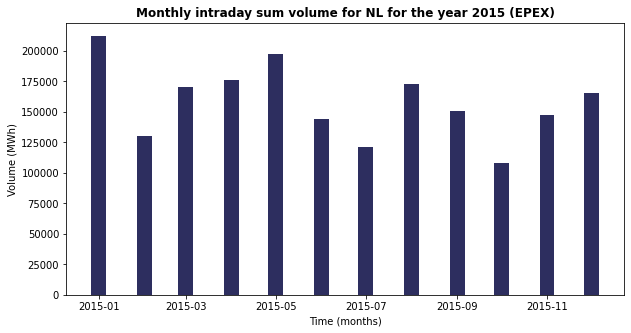

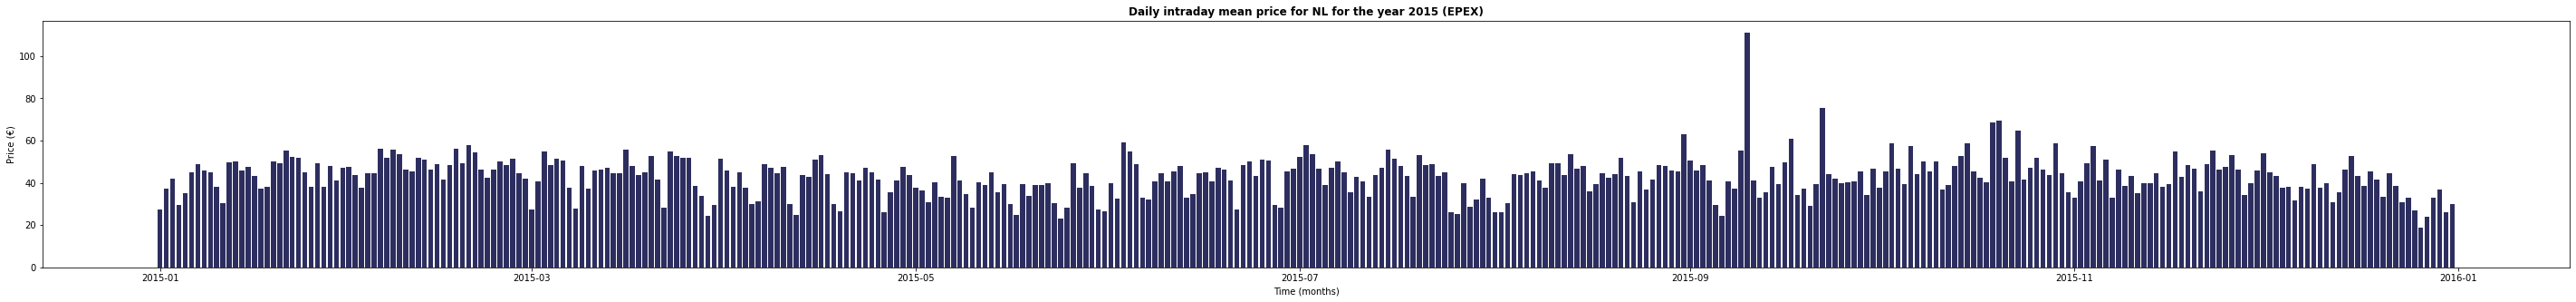


...

Year: 2016

...



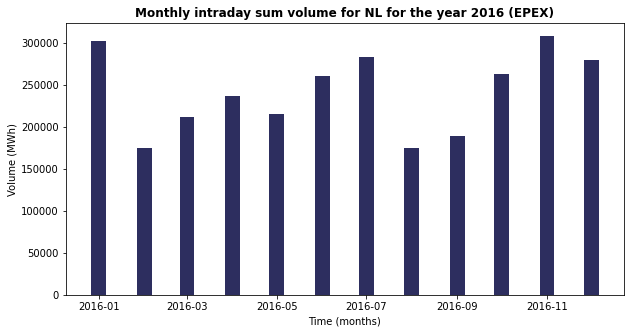

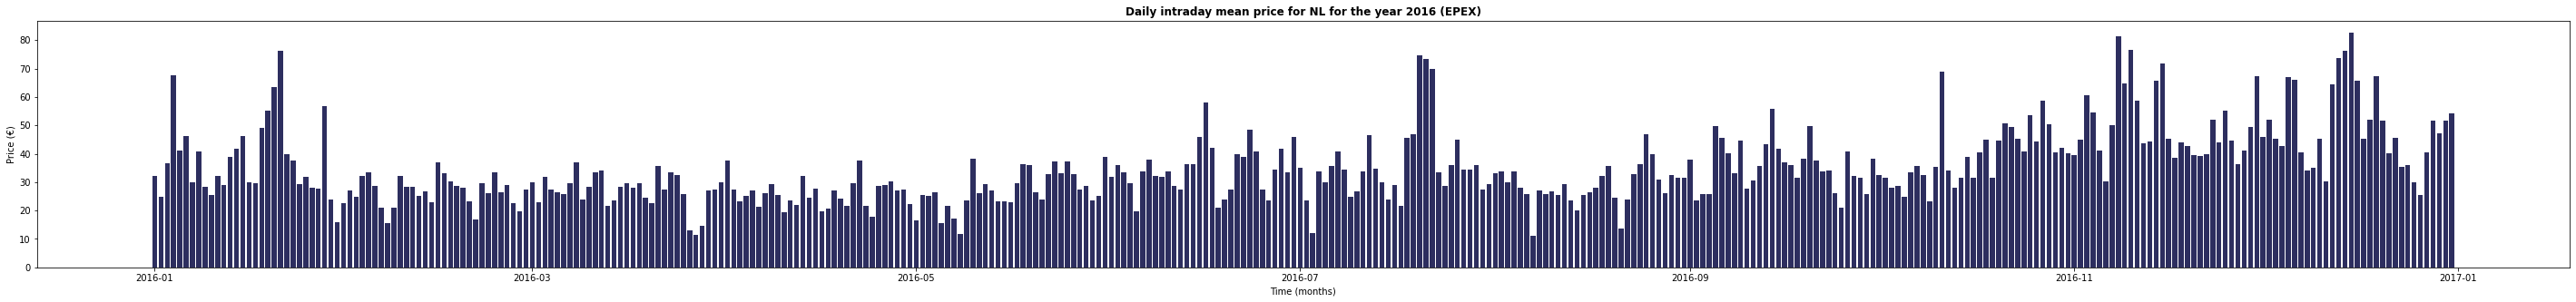


...

Year: 2017

...



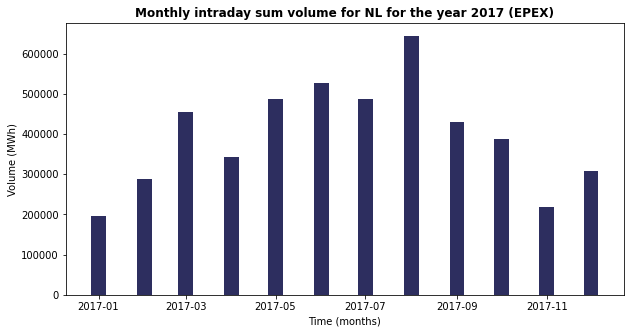

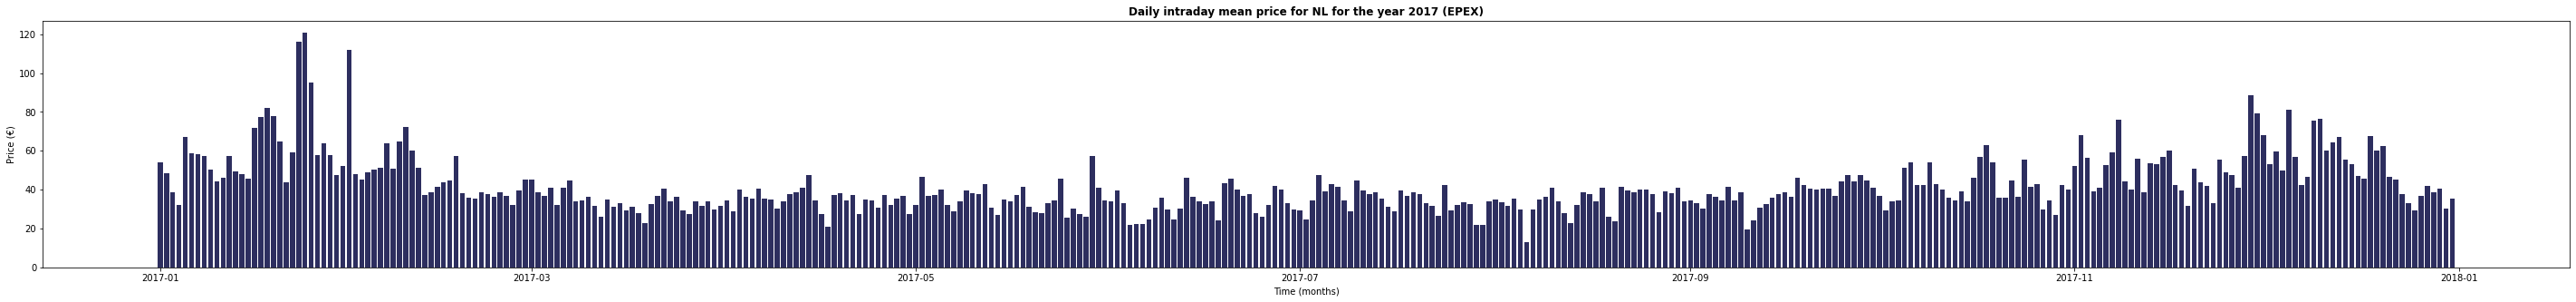


...

Year: 2018

...



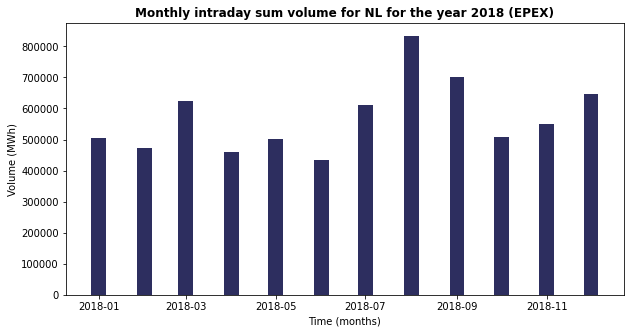

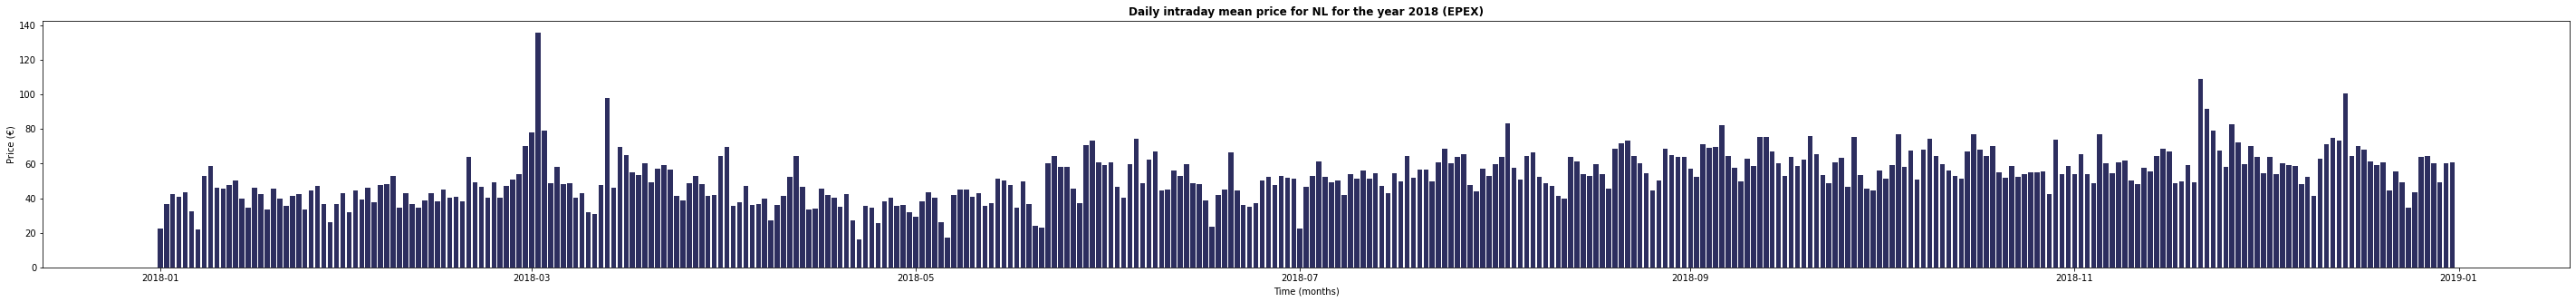


...

Year: 2019

...



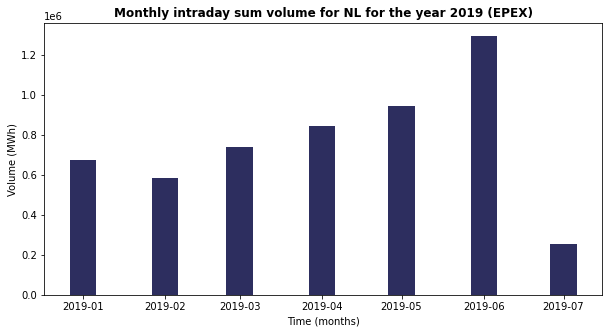

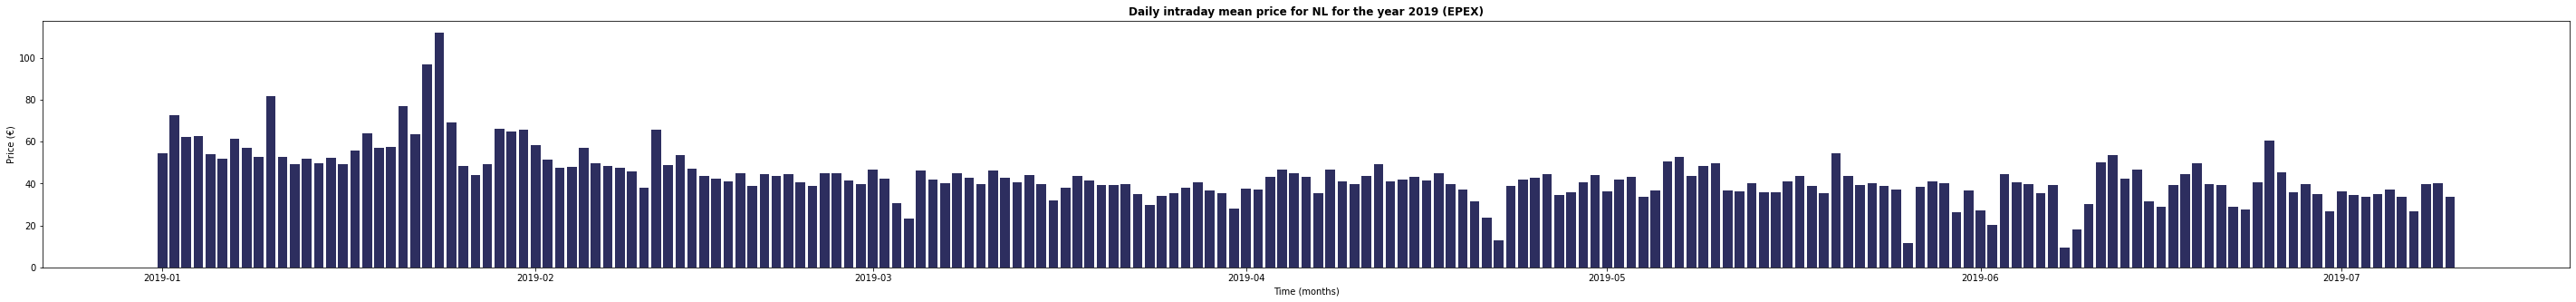

In [6]:
for y in years:

    y = int(y)

    print('')
    print(colored('...','white'))
    print('')
    print(colored(f'Year: {y}', 'blue'))
    print('')
    print(colored('...','white'))
    print('')

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(dfo_group[dfo_group.index.year == y].index, dfo_group[dfo_group.index.year == y]['Volume'], width=10)
    ax.set_title(f'Monthly intraday sum volume for {country} for the year {y} (EPEX)')
    ax.set_xlabel(r'Time (months)')
    ax.set_ylabel(r'Volume (MWh)')
    plt.show()

    fig, ax = plt.subplots(figsize=(50, 5))
    ax.bar(dfo_group2[dfo_group2.index.year == y].index, dfo_group2[dfo_group2.index.year == y]['Price'])
    # ax.bar(df_group[df_group.index.year == 2019].index, df_group[df_group.index.year == 2019]['Volume'], width=10)
    # ax.bar(df_group2['Date'], df_group2['Price'])
    ax.set_title(f'Daily intraday mean price for {country} for the year {y} (EPEX)')
    ax.set_xlabel(r'Time (months)')
    ax.set_ylabel(r'Price (€)')
    plt.show()

# Plot monthly volume (ID, sum) for the whole period

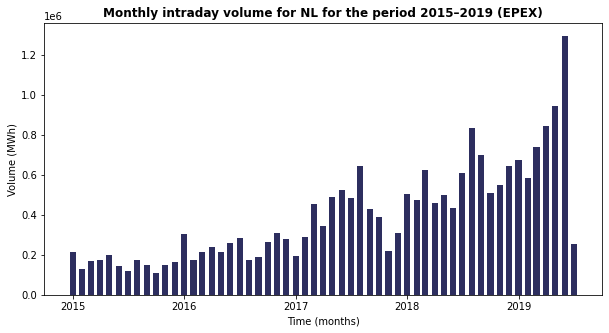

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(dfo_group['Date'], dfo_group['Volume'], width=20)
ax.set_title(f'Monthly intraday volume for {country} for the period {years[0]}–{years[-1]} (EPEX)')
ax.set_xlabel(r'Time (months)')
ax.set_ylabel(r'Volume (MWh)');

# Show intraday (df) grouped on differerent timescales (month, day, hour)

In [8]:
print('')
print(colored('...','white'))
print('')
print(colored(f'(ID) Grouped by month', 'blue'))
print('')
print(colored('...','white'))
print('')

print(dfo_group)

print('')
print(colored('...','white'))
print('')
print(colored(f'(ID) Grouped by day', 'blue'))
print('')
print(colored('...','white'))
print('')

print(dfo_group2)

print('')
print(colored('...','white'))
print('')
print(colored(f'(ID) Grouped by hour', 'blue'))
print('')
print(colored('...','white'))
print('')

print(dfo_group3)


...

(ID) Grouped by month

...

0                  Price     Volume       Date
Date                                          
2015-01-01  3.457300e+05   212187.8 2015-01-01
2015-02-01  2.495012e+05   130494.8 2015-02-01
2015-03-01  2.953758e+05   170613.2 2015-03-01
2015-04-01  3.548340e+05   176430.8 2015-04-01
2015-05-01  3.610562e+05   197144.2 2015-05-01
2015-06-01  2.821284e+05   144149.2 2015-06-01
2015-07-01  2.864884e+05   121003.6 2015-07-01
2015-08-01  3.329580e+05   172874.8 2015-08-01
2015-09-01  2.842990e+05   150729.6 2015-09-01
2015-10-01  2.664340e+05   108321.2 2015-10-01
2015-11-01  2.791139e+05   147777.6 2015-11-01
2015-12-01  2.377541e+05   165364.0 2015-12-01
2016-01-01  4.192133e+05   302455.8 2016-01-01
2016-02-01  1.912474e+05   175120.4 2016-02-01
2016-03-01  2.237005e+05   212234.8 2016-03-01
2016-04-01  1.927699e+05   237512.0 2016-04-01
2016-05-01  2.237450e+05   214970.0 2016-05-01
2016-06-01  2.986222e+05   260836.8 2016-06-01
2016-07-01  3.196311e+05  

# Merge intraday (df) and day-ahead (df)

In [9]:
OG = pd.merge(dfo_group3, df_da2, how='outer', left_index=True, right_index=True)

OG['Absolute'] = np.subtract(OG['Price'], OG['MCP'])
OG['Percentual'] = 100 * np.divide(np.subtract(OG['Price'], OG['MCP']), OG['MCP'])

print('')
print(colored('...','white'))
print('')
print(colored(f'(DA & ID) Grouped by hour', 'blue'))
print('')
print(colored('...','white'))
print('')

print(OG)


...

(DA & ID) Grouped by hour

...

                         Price     Volume                Date    MCP  \
Date                                                                   
2015-01-01 00:00:00  27.342857  14.257143 2015-01-01 00:00:00  38.50   
2015-01-01 01:00:00  24.041667  11.566667 2015-01-01 01:00:00  38.22   
2015-01-01 02:00:00  25.000000   6.000000 2015-01-01 02:00:00  35.60   
2015-01-01 03:00:00  26.500000   5.500000 2015-01-01 03:00:00  33.00   
2015-01-01 04:00:00  25.500000   9.500000 2015-01-01 04:00:00  27.41   
...                        ...        ...                 ...    ...   
2019-12-31 19:00:00        NaN        NaN                 NaT  46.00   
2019-12-31 20:00:00        NaN        NaN                 NaT  42.20   
2019-12-31 21:00:00        NaN        NaN                 NaT  39.74   
2019-12-31 22:00:00        NaN        NaN                 NaT  38.88   
2019-12-31 23:00:00        NaN        NaN                 NaT  37.21   

                      Abs

# Plot absolute and percentual difference between day-ahead price (MCP) and intraday price (mean) for given period

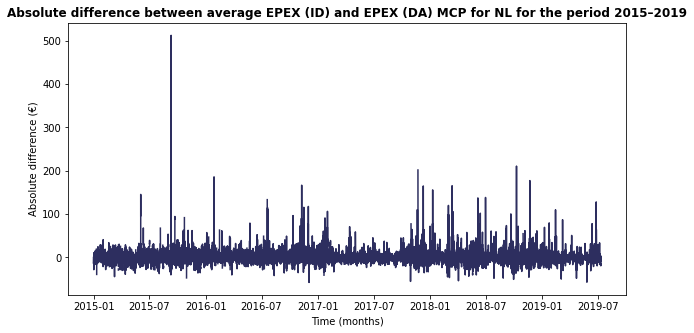

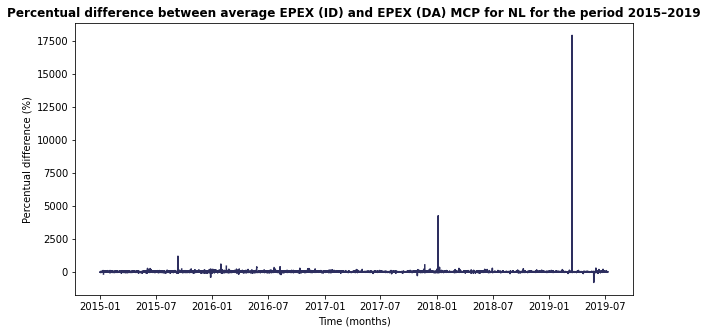

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(OG.index, OG.Absolute)
ax.set_title(f'Absolute difference between average EPEX (ID) and EPEX (DA) MCP for {country} for the period {years[0]}–{years[-1]}')
ax.set_xlabel(r'Time (months)')
ax.set_ylabel(r'Absolute difference (€)');

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(OG.index, OG.Percentual)
ax.set_title(f'Percentual difference between average EPEX (ID) and EPEX (DA) MCP for {country} for the period {years[0]}–{years[-1]}')
ax.set_xlabel(r'Time (months)')
ax.set_ylabel(r'Percentual difference (%)');

# Specify day

In [11]:
datetime_of_interest = '2019-04-03 15:00:00'

# Calculate intraday price distribution and intraday cumulative volume for given day

In [12]:
filtered_dates = pd.DataFrame()
filtered_dates = dfo.loc[dfo["Date"] == datetime_of_interest]

filtered_dates['Volume_weighted'] = filtered_dates['Price'] * filtered_dates['Volume']
filtered_dates['Cumulative volume'] = ''
filtered_dates['Relative volume'] = ''

volume_tot = filtered_dates['Volume'].sum()

df = filtered_dates
for idx, row in df.iterrows():
    df['Cumulative volume'][idx] = df.loc[df['Price'] <= df['Price'][idx]]['Volume'].sum()
    df['Relative volume'][idx] = df['Cumulative volume'][idx] / volume_tot

# quantiles = [0, 10, 25, 45, 55, 75, 90, 100]
# quantiles_val = list()
# quantiles_idx = list()
# for q in quantiles:
#     quantiles_val.append(filtered_dates['Price'].quantile(q/100))
#     quantiles_idx.append(f'Q{q}')

df = filtered_dates
quantiles = [0, 0.1, 0.25, 0.45, 0.55, 0.75, 0.9, 1.0]
quantiles_val = list()
quantiles_idx = list()

for q in quantiles:
    
    if q == 0:
        quantiles_val.append(df.sort_values('Relative volume', ascending=True).iloc[0]['Price'])
        continue

    if q == 1.0:
        quantiles_val.append(df.sort_values('Relative volume', ascending=False).iloc[0]['Price'])
        continue

    x1 = df.loc[df['Relative volume'] <= q].sort_values('Relative volume', ascending=False).iloc[0]['Relative volume']
    y1 = df.loc[df['Relative volume'] <= q].sort_values('Relative volume', ascending=False).iloc[0]['Price']
    x2 = df.loc[df['Relative volume'] >= q].sort_values('Relative volume', ascending=True).iloc[0]['Relative volume']
    y2 = df.loc[df['Relative volume'] >= q].sort_values('Relative volume', ascending=True).iloc[0]['Price']

    if y2 == y1:
        quantiles_val.append(y2)
    else:
        delta = (y2 - y1) / (x2 - x1)
        quantiles_val.append(y1 + (q - x1) * delta)

print('')
print(colored('...','white'))
print('')
print(colored(f'Finished successfully', 'green'))
print('')
print(colored('...','white'))
print('')


...

Finished successfully

...



# Plot intraday price distribution and intraday cumulative volume for given day

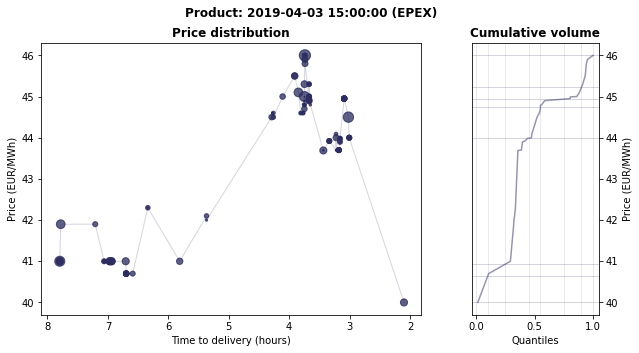

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})
plt.suptitle(f'Product: {datetime_of_interest} (EPEX)')

x = filtered_dates['Time to delivery']
y = filtered_dates['Price']
ax1.scatter(x, y, s=filtered_dates['Volume'].apply(lambda x: x*5), alpha=0.5)
ax1.plot(x, y, linewidth=1, alpha=0.2)
ax1.set_xlim(x.min() - 0.05 * (x.max() - x.min()), x.max() + 0.05 * (x.max() - x.min()))
ax1.set_ylim(y.min() - 0.05 * (y.max() - y.min()), y.max() + 0.05 * (y.max() - y.min()))
ax1.set_title(f'Price distribution')
ax1.set_xlabel(r'Time to delivery (hours)')
ax1.set_ylabel(r'Price (EUR/MWh)')
ax1.invert_xaxis()

x = filtered_dates.sort_values('Price')['Relative volume']
y = filtered_dates.sort_values('Price')['Price']
[ax2.axhline(q, linewidth=1, alpha=0.2) for q in quantiles_val]
[ax2.axvline(q, linewidth=1, alpha=0.1) for q in quantiles]
ax2.plot(x, y, alpha=0.5)
ax2.set_xlim(x.min() - 0.05 * (x.max() - x.min()), x.max() + 0.05 * (x.max() - x.min()))
ax2.set_ylim(y.min() - 0.05 * (y.max() - y.min()), y.max() + 0.05 * (y.max() - y.min()))
ax2.set_title(f'Cumulative volume')
ax2.set_xlabel(r'Quantiles')
ax2.set_ylabel(r'Price (EUR/MWh)')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")